# **Image Classification with CNNs (MNIST Dataset)**

## **Objective**
The objective of this project is to build and train a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify handwritten digits from the MNIST dataset. By the end of this notebook, you will understand:
- The key concepts of CNNs.
- How to process and visualize image data.
- The architecture and working of CNNs.
- How to implement CNNs step by step.
- Evaluation of the model's performance.

---

## **Metadata**
- **Project Name**: Image Classification with CNNs
- **Dataset**: MNIST Handwritten Digits
- **Tech Stack**: Python, TensorFlow, Keras, Matplotlib, NumPy
- **Skills Demonstrated**:
  - Convolutional Neural Network (CNN) Implementation
  - Image Preprocessing
  - Training and Evaluation of Deep Learning Models
  - Model Performance Analysis

---

## **Dataset Overview**

The **MNIST dataset** is one of the most commonly used datasets for image classification tasks. It consists of grayscale images of digits (0-9).

### **Key Details**:
- **Number of Classes**: 10 (Digits 0 to 9)
- **Image Shape**: 28 x 28 pixels
- **Color Channel**: Single-channel (Grayscale)
- **Train Samples**: 60,000
- **Test Samples**: 10,000

### **Dataset Features**:
Each sample in the dataset is a grayscale image represented as a 2D array of shape `(28, 28)`, where each pixel value ranges from 0 to 255. The label corresponds to the digit depicted in the image.

---

## **Acknowledgements**
The MNIST dataset was created by Yann LeCun and is publicly available at [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/). It is widely used for benchmarking machine learning and deep learning models.

---

## **Exploratory Data Analysis (EDA)**

Before building the CNN, let’s explore the dataset to understand its structure and visualize some samples.

### **1. Loading the Dataset**
The MNIST dataset can be directly imported using TensorFlow/Keras.

### **2. Visualizing Sample Images**
We will display a few images from the dataset along with their corresponding labels to ensure the data is loaded correctly.

### **3. Analyzing Pixel Values**
The pixel values of the images range from 0 (black) to 255 (white). We'll plot the distribution of pixel values to understand the intensity levels.



# **Step 1: Loading and Visualizing the Dataset**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


### **Explanation of Code**
1. **Libraries Imported**:
   - `numpy` for numerical operations.
   - `matplotlib.pyplot` for visualizations.
   - `tensorflow.keras.datasets` to load the MNIST dataset.
2. **Loading the Dataset**:
   - `mnist.load_data()` automatically splits the dataset into training and testing sets.
   - Training set: `(X_train, y_train)` contains 60,000 images and their labels.
   - Testing set: `(X_test, y_test)` contains 10,000 images and their labels.
3. **Dataset Shape**:
   - `X_train.shape` shows the dimensions `(60000, 28, 28)` indicating 60,000 grayscale images of size 28x28.
   - `y_train.shape` is `(60000,)`, representing the labels for each image.
---

## **Visualizing Sample Images**


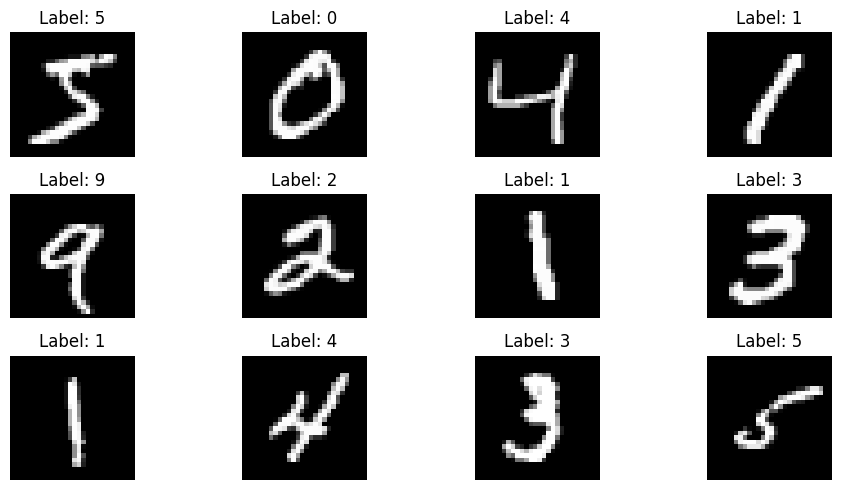

In [2]:
# Visualize a few images with their labels
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### **Explanation of Code**
1. **Visualization Setup**:
   - `plt.figure(figsize=(10, 5))` creates a canvas for plotting with a size of 10x5.
   - `for i in range(12):` loops through the first 12 images.
2. **Subplots**:
   - `plt.subplot(3, 4, i + 1)` creates a grid of 3 rows and 4 columns for displaying 12 images.
3. **Image Display**:
   - `plt.imshow()` displays each image with a grayscale color map (`cmap="gray"`).
   - `plt.title()` adds the label for the corresponding image.
   - `plt.axis("off")` removes axes for better visualization.
4. **Layout**:
   - `plt.tight_layout()` ensures that the images and titles don’t overlap.
   - `plt.show()` renders the visualizations.
---

## **Analyzing Pixel Values**


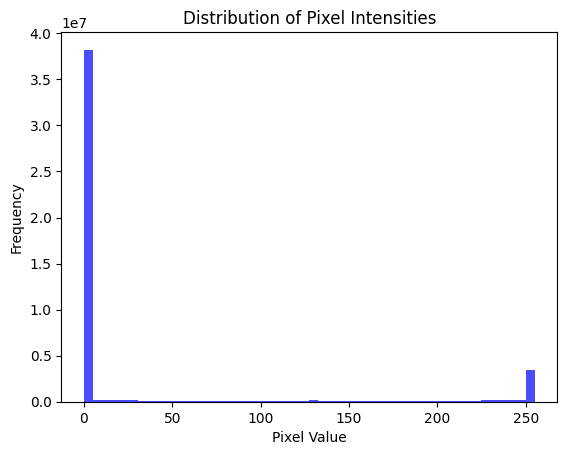

In [3]:
# Analyzing the distribution of pixel values
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### **Explanation of Code**
1. **Flattening the Data**:
   - `X_train.flatten()` converts the 2D array of pixel values into a 1D array to plot the histogram.
2. **Histogram**:
   - `plt.hist()` creates a histogram to show the frequency distribution of pixel values.
   - `bins=50` divides the range into 50 intervals for better granularity.
3. **Plot Customizations**:
   - Titles and labels are added to make the plot more informative.
   - `plt.show()` renders the histogram.

**Insight**: The pixel values range from 0 to 255, where 0 represents black and 255 represents white. Most values are closer to 0.
---

## **Step 2: Preprocessing the Data**


In [4]:
# Reshape the data to include a single color channel and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### **Explanation of Code**
1. **Reshaping the Data**:
   - `reshape(-1, 28, 28, 1)` adds a dimension for the single-channel grayscale images.
   - `-1` lets NumPy automatically calculate the size based on the input.
2. **Normalization**:
   - Dividing by `255.0` scales pixel values to the range `[0, 1]` for faster training and better convergence.
3. **One-Hot Encoding**:
   - `to_categorical(y, num_classes=10)` converts labels (0-9) into a binary matrix of shape `(num_samples, 10)`.
   - Example: Label `3` becomes `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.
---

## **Step 3: Building the CNN Model**


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Explanation of Code**
1. **Importing Layers**:
   - `Conv2D`: Performs convolution to extract spatial features.
   - `MaxPooling2D`: Reduces spatial dimensions via pooling.
   - `Flatten`: Converts feature maps to a 1D vector for dense layers.
   - `Dense`: Fully connected layers for classification.
2. **Defining the Architecture**:
   - First `Conv2D` layer: Extracts 32 features with a `3x3` kernel and ReLU activation.
   - `MaxPooling2D`: Reduces the spatial dimensions by half.
   - Second `Conv2D` layer: Extracts 64 features with a `3x3` kernel.
   - `Flatten`: Converts the 2D feature maps into a 1D vector.
   - `Dense` layers:
     - First Dense: 128 neurons with ReLU activation.
     - Second Dense: 10 neurons with softmax activation for multi-class classification.
3. **Compilation**:
   - Optimizer: `adam` for efficient gradient descent.
   - Loss: `categorical_crossentropy` for multi-class classification.
   - Metrics: Accuracy to evaluate performance.
4. **Model Summary**:
   - `model.summary()` provides an overview of the layers and the total parameters.


# **Step 4: Training the CNN**

In [6]:
# Train the CNN model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step - accuracy: 0.8988 - loss: 0.3462 - val_accuracy: 0.9831 - val_loss: 0.0536
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9851 - val_loss: 0.0451
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9881 - val_loss: 0.0335
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9937 - loss: 0.0221 - val_accuracy: 0.9906 - val_loss: 0.0301
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9910 - val_loss: 0.0285
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9891 - val_loss: 0.0393
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9974 - loss: 0.0084 - 

### **Explanation of Code**
1. **Model Training**:
   - `model.fit()` is used to train the CNN on the training data.
   - `X_train` and `y_train` are the input images and their corresponding one-hot-encoded labels.
   - `validation_data=(X_test, y_test)` allows the model to evaluate performance on the test set after each epoch.
2. **Hyperparameters**:
   - `epochs=10`: The model trains for 10 complete passes over the dataset.
   - `batch_size=64`: The data is divided into mini-batches of 64 samples for gradient updates.
3. **Training History**:
   - The function returns a `history` object that stores metrics like loss and accuracy for each epoch.



## **Step 5: Visualizing Training Performance**

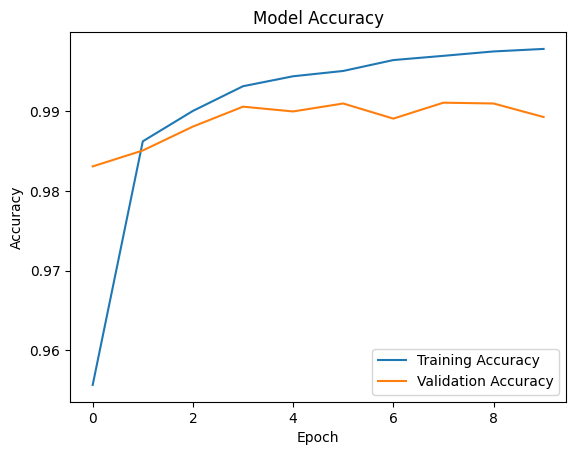

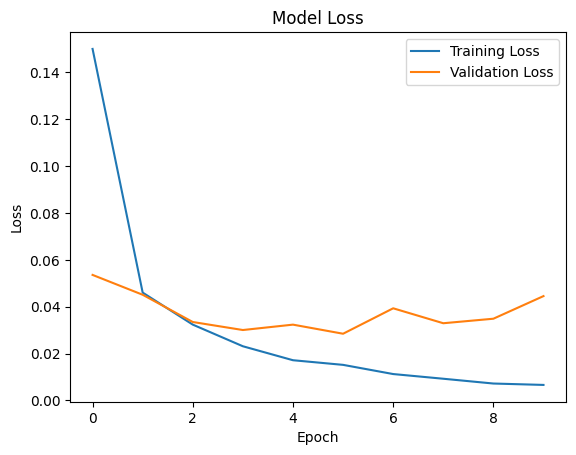

In [7]:


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Explanation of Code**
1. **Accessing Training History**:
   - `history.history` contains recorded metrics for each epoch (e.g., `accuracy`, `loss`, `val_accuracy`, `val_loss`).
2. **Accuracy Plot**:
   - `plt.plot()` plots training and validation accuracy over epochs.
   - `label` specifies which line corresponds to which metric.
   - `plt.title()` and `plt.xlabel()` add labels and titles for better understanding.
3. **Loss Plot**:
   - Similar steps are followed to plot training and validation loss.
4. **Insights**:
   - The accuracy curve indicates how well the model learns.
   - If the validation loss plateaus or increases, it may suggest overfitting.
---

## **Step 6: Evaluating the Model**



In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.0445
Test Accuracy: 98.93%


### **Explanation of Code**
1. **Model Evaluation**:
   - `model.evaluate()` calculates the loss and accuracy on the test set.
   - `verbose=0` suppresses the output during evaluation.
2. **Metrics**:
   - `test_loss`: Indicates how well the model generalizes to unseen data.
   - `test_accuracy`: Represents the percentage of correctly classified test samples.
3. **Results**:
   - Print statements display the test loss and accuracy in a readable format.
---

## **Step 7: Making Predictions**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


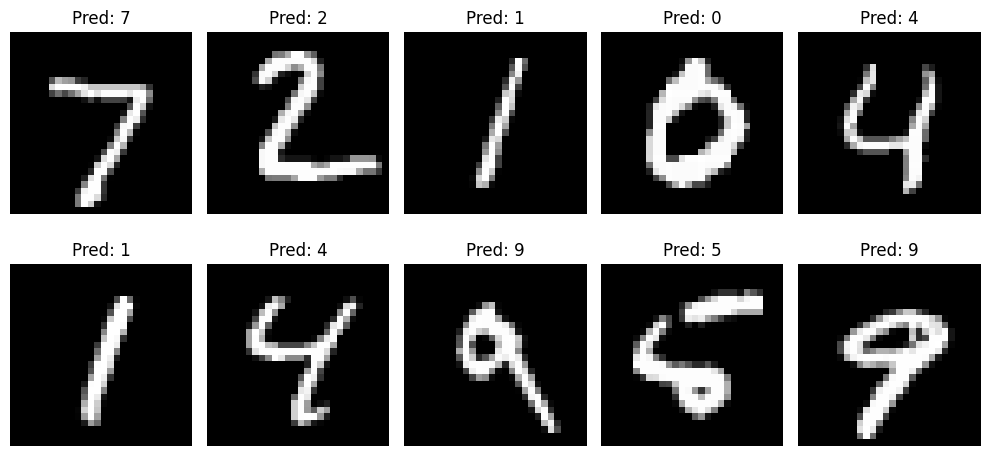

In [9]:
# Predict the first 10 test samples
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Visualize the predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### **Explanation of Code**
1. **Generating Predictions**:
   - `model.predict(X_test[:10])` computes the probabilities for the first 10 test samples.
   - `np.argmax(predictions, axis=1)` extracts the label with the highest probability for each sample.
2. **Visualizing Predictions**:
   - Each image is displayed using `plt.imshow()`.
   - The predicted label is shown as the title.
3. **Insights**:
   - This visualization helps verify whether the model predicts correctly.
---

## **Step 8: Saving the Model**


In [10]:
# Save the trained model
model.save("mnist_cnn_model.h5")
print("Model saved as 'mnist_cnn_model.h5'")

Model saved as 'mnist_cnn_model.h5'


### **Explanation of Code**
1. **Saving the Model**:
   - `model.save()` saves the trained model to a file for later use.
   - `mnist_cnn_model.h5` is the filename used in this case.
2. **Usefulness**:
   - The saved model can be loaded later for predictions without retraining.
---

## **Step 9: Loading the Saved Model**


In [11]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_cnn_model.h5")

# Test the loaded model on the test set
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy * 100:.2f}%")

Loaded Model Test Accuracy: 98.93%


### **Explanation of Code**
1. **Loading the Model**:
   - `load_model()` restores the previously saved model.
2. **Testing the Loaded Model**:
   - The loaded model is evaluated on the test set to confirm its performance is identical to the original trained model.
3. **Insights**:
   - This demonstrates how saving/loading allows seamless reuse of trained models.
---

## **Conclusion**
In this notebook, we successfully built, trained, and evaluated a CNN for handwritten digit classification on the MNIST dataset.

### **Key Learnings**:
1. **CNNs**:
   - Effective for image classification tasks due to their ability to capture spatial hierarchies.
2. **Preprocessing**:
   - Normalizing pixel values and reshaping data are crucial for faster convergence.
3. **Evaluation**:
   - Training and validation curves help monitor model performance.
4. **Deployment**:
   - Models can be saved, loaded, and reused efficiently.

